### Импорт библиотек и датасета

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno

In [ ]:
vgsales = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/vgsales.csv")
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задание 1. Найти пропущенные значения в датасете с помощью библиотеки missingno

<Axes: >

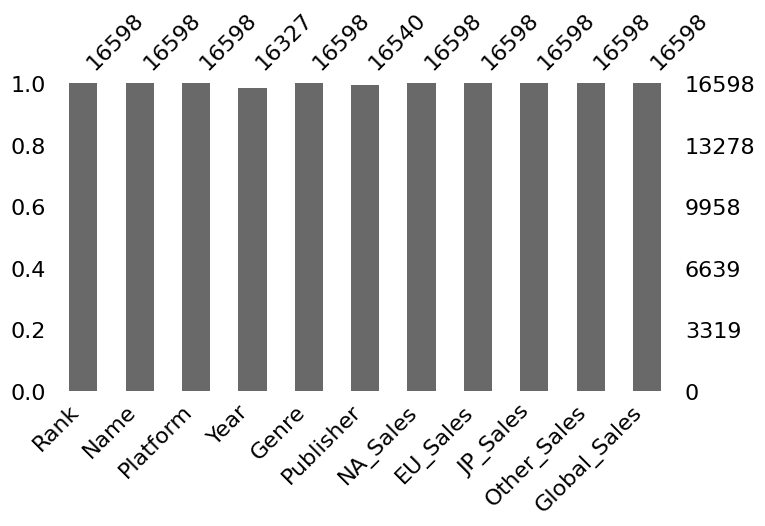

In [ ]:
msno.bar(vgsales, figsize=(8, 4))

<Axes: >

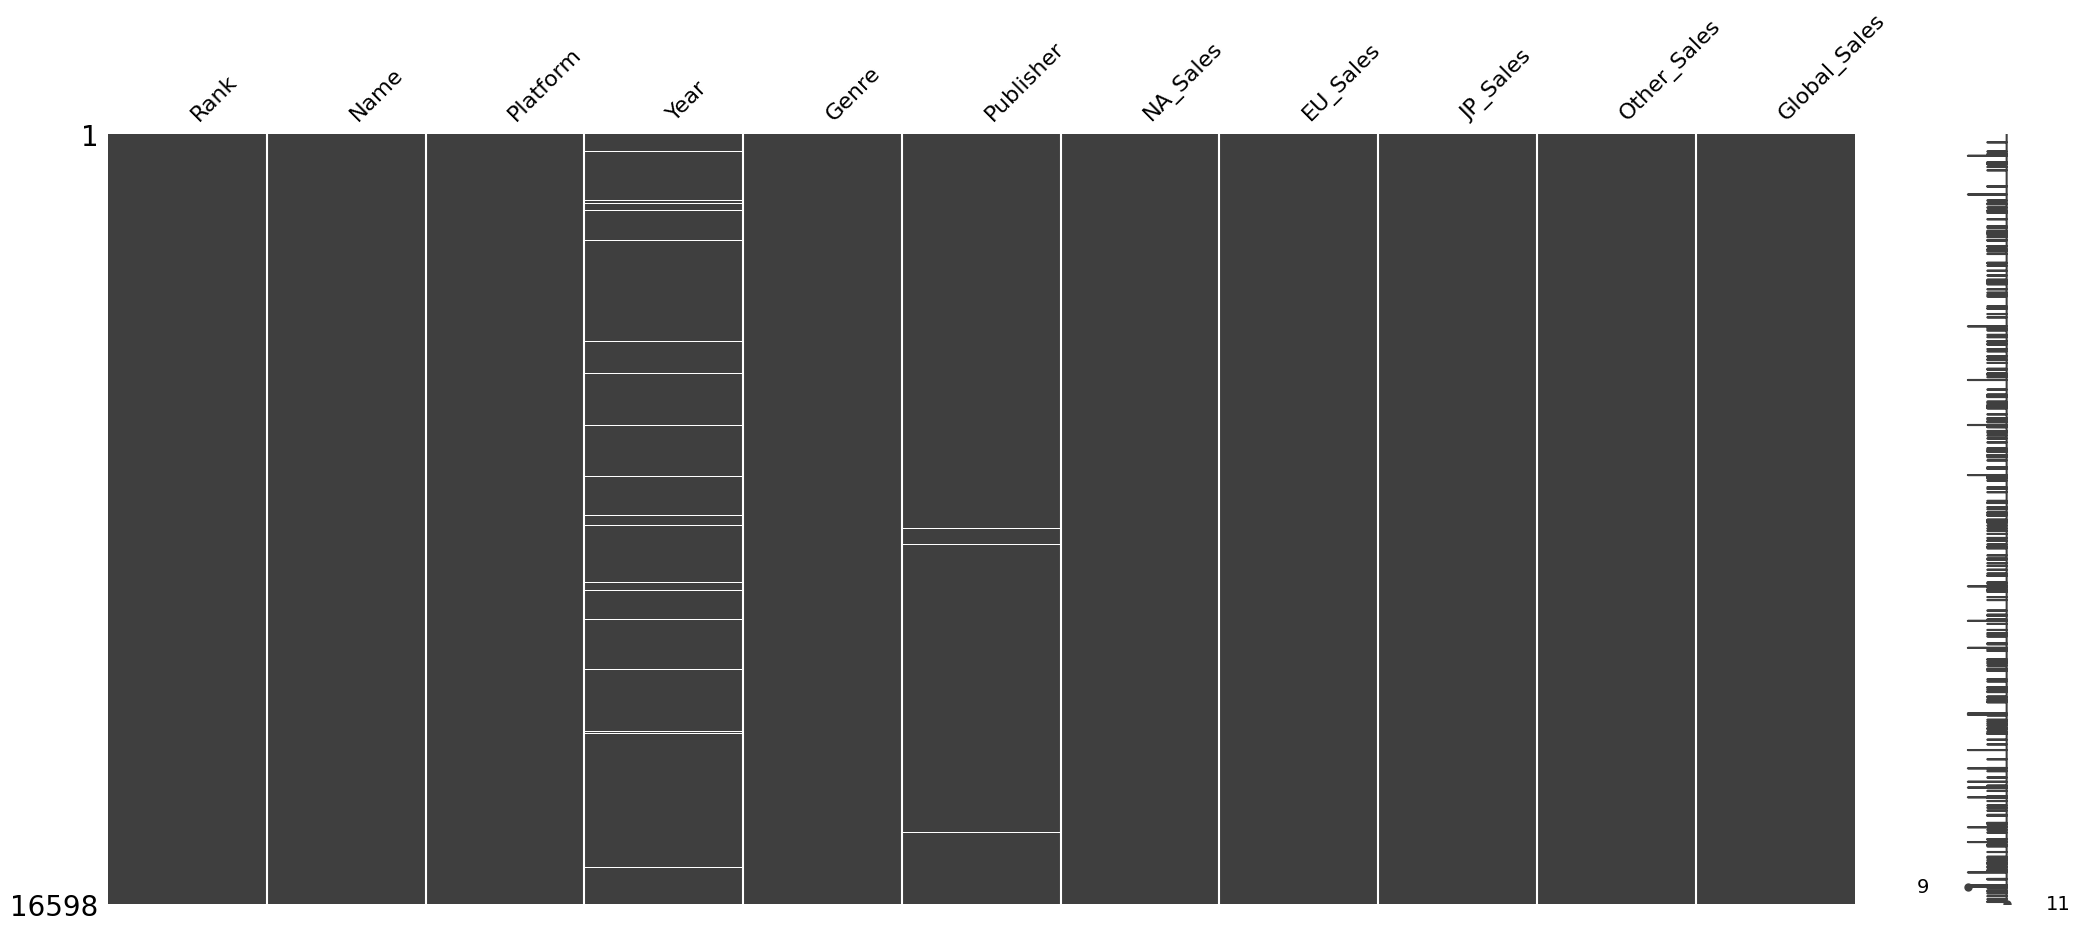

In [ ]:
msno.matrix(vgsales)

### Задание 2. Построить диаграмму распределения мировых продаж игр.



In [ ]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


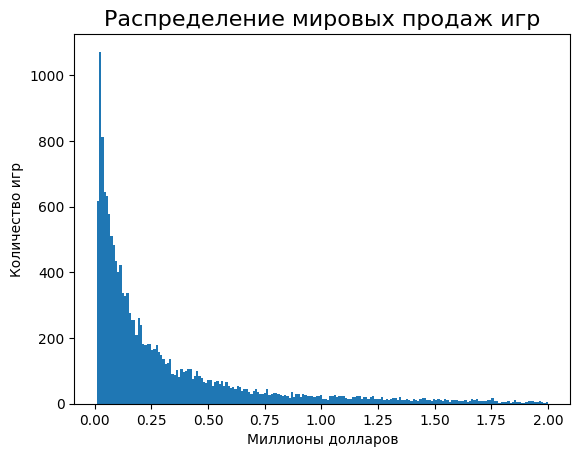

In [ ]:
plt.xlabel("Миллионы долларов")
plt.ylabel("Количество игр")
plt.title("Распределение мировых продаж игр", fontsize=16)

plt.hist(vgsales['Global_Sales'][vgsales['Global_Sales'] <= 2], bins = 200)

plt.show()

### Задание 3. Постройте ящик с усами для каждого жанра внутри переменной Genre. Оставить только те игры, суммарные продажи которых меньше 5 миллионов долларов.

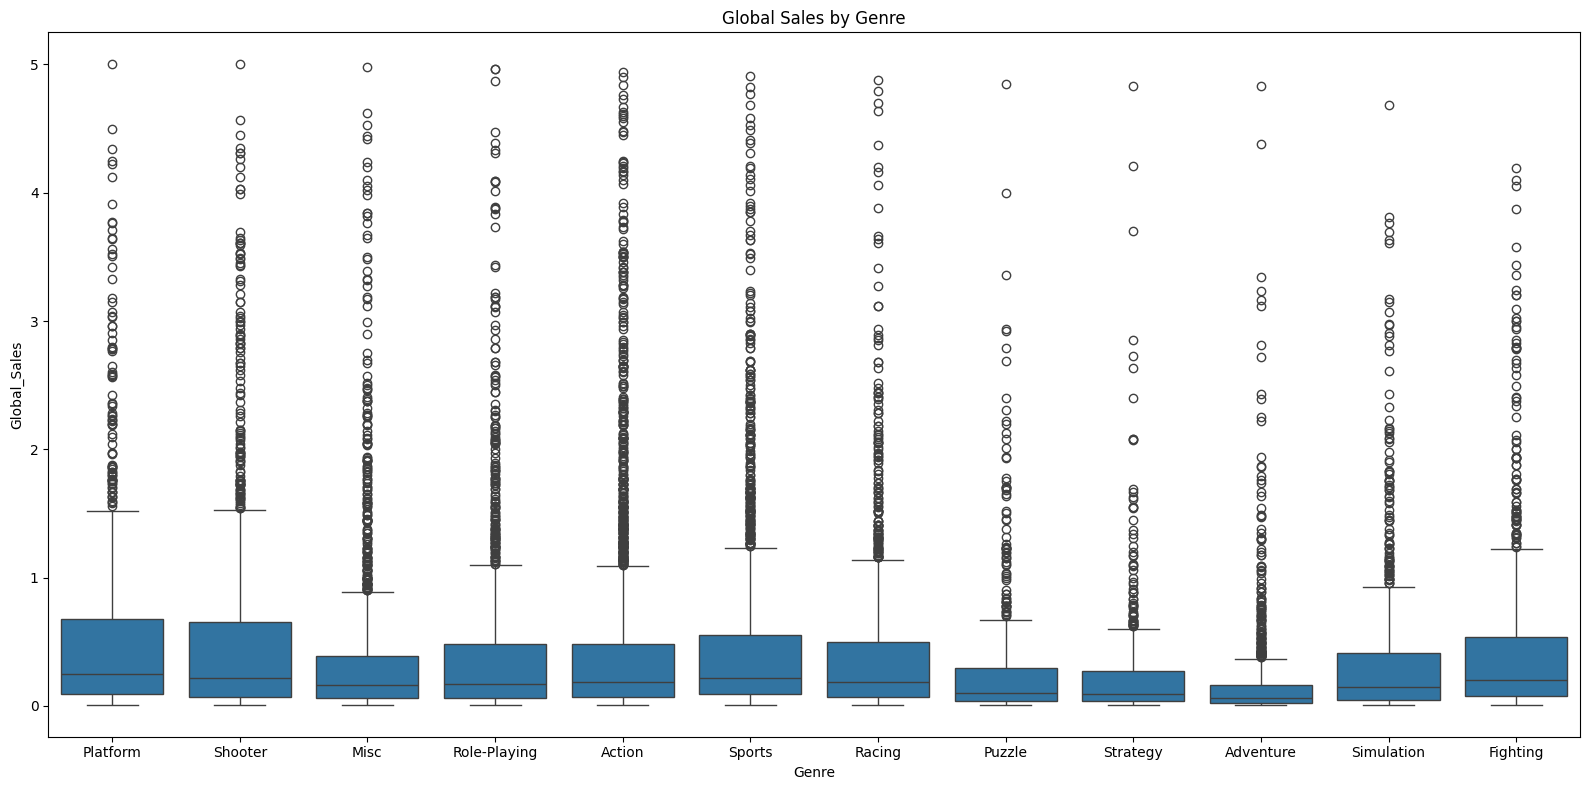

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='Genre', y='Global_Sales', data=vgsales[vgsales['Global_Sales'] <= 5])
plt.title('Global Sales by Genre')

plt.tight_layout()
plt.show()

### Задание 4. Найти сколько игр выпустил каждый издатель. Построить столбчатую горизонтальную диаграмму для визуализации получившегося количества.

In [ ]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


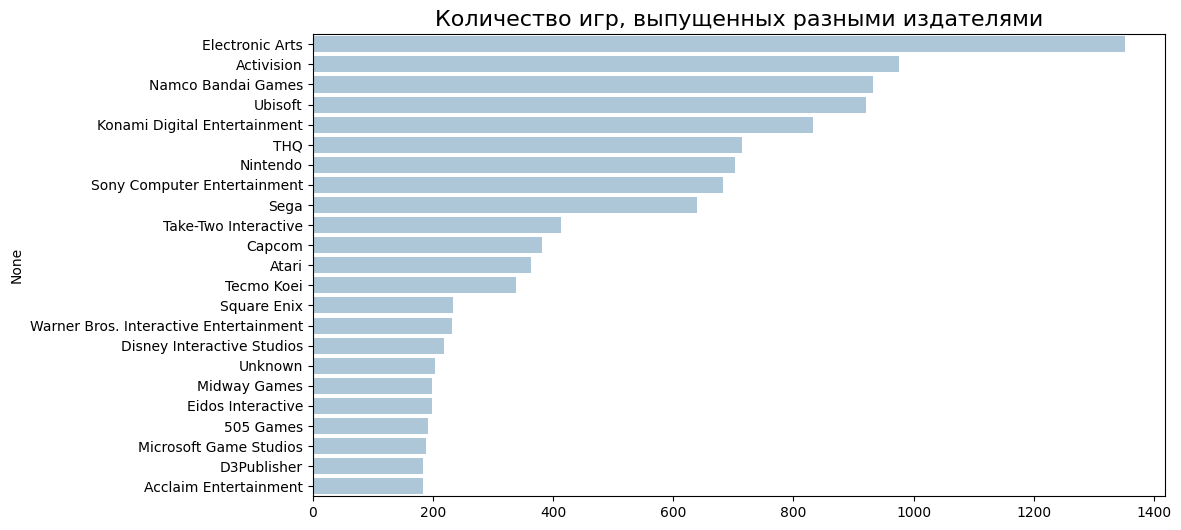

In [ ]:
games_publishers = vgsales['Publisher'].value_counts()[vgsales['Publisher'].value_counts(normalize=True)>=0.01]

plt.figure(figsize=(11,6))
plt.title("Количество игр, выпущенных разными издателями", fontsize=16)

sns.barplot(y=games_publishers.index, x=games_publishers.values, alpha=0.4)
plt.show()

### Задание 5. Найти сколько игр было выпущено в жанре "Спорт" в разные годы. Построить линейный график популярности этого жанра.

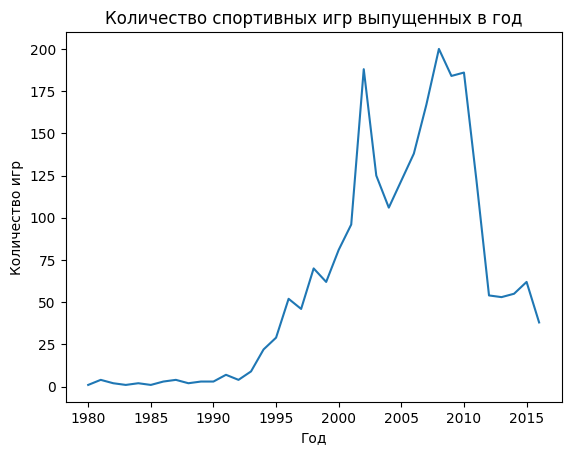

In [ ]:
plt.title("Количество спортивных игр выпущенных в год")
plt.xlabel("Год")
plt.ylabel("Количество игр")

plt.plot(vgsales[vgsales['Genre'] == 'Sports']['Year'].value_counts().sort_index())

### Задание 6. Построить зависимость между продажами в разных регионах мира и общими продажами.

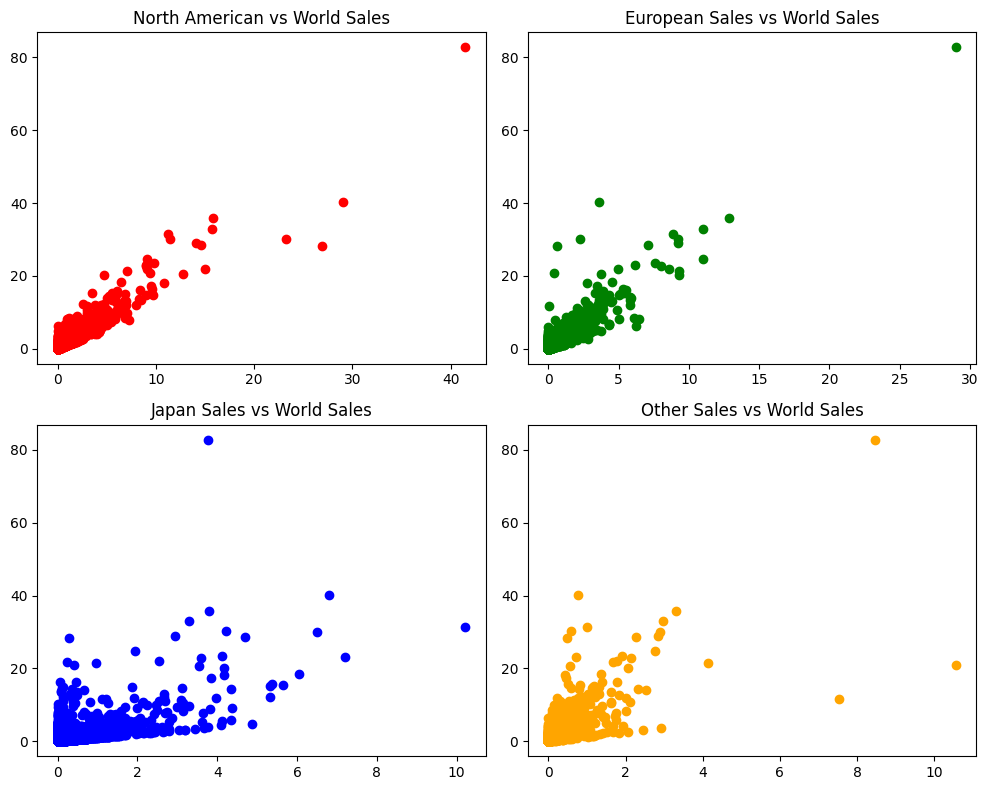

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(vgsales['NA_Sales'], vgsales['Global_Sales'], color='r')
axs[0, 0].set_title('North American vs World Sales')

axs[0, 1].scatter(vgsales['EU_Sales'], vgsales['Global_Sales'], color='g')
axs[0, 1].set_title('European Sales vs World Sales')

axs[1, 0].scatter(vgsales['JP_Sales'], vgsales['Global_Sales'], color='b')
axs[1, 0].set_title('Japan Sales vs World Sales')

axs[1, 1].scatter(vgsales['Other_Sales'], vgsales['Global_Sales'], color='orange')
axs[1, 1].set_title('Other Sales vs World Sales')

plt.tight_layout()

plt.show()

### Задание 7. Подсчитать, сколько игр выходило на разные платформы в разные годы.



Поскольку платформ слишком много, оставим только 24 из них.

In [ ]:
len(vgsales['Platform'].unique()[:24])

24

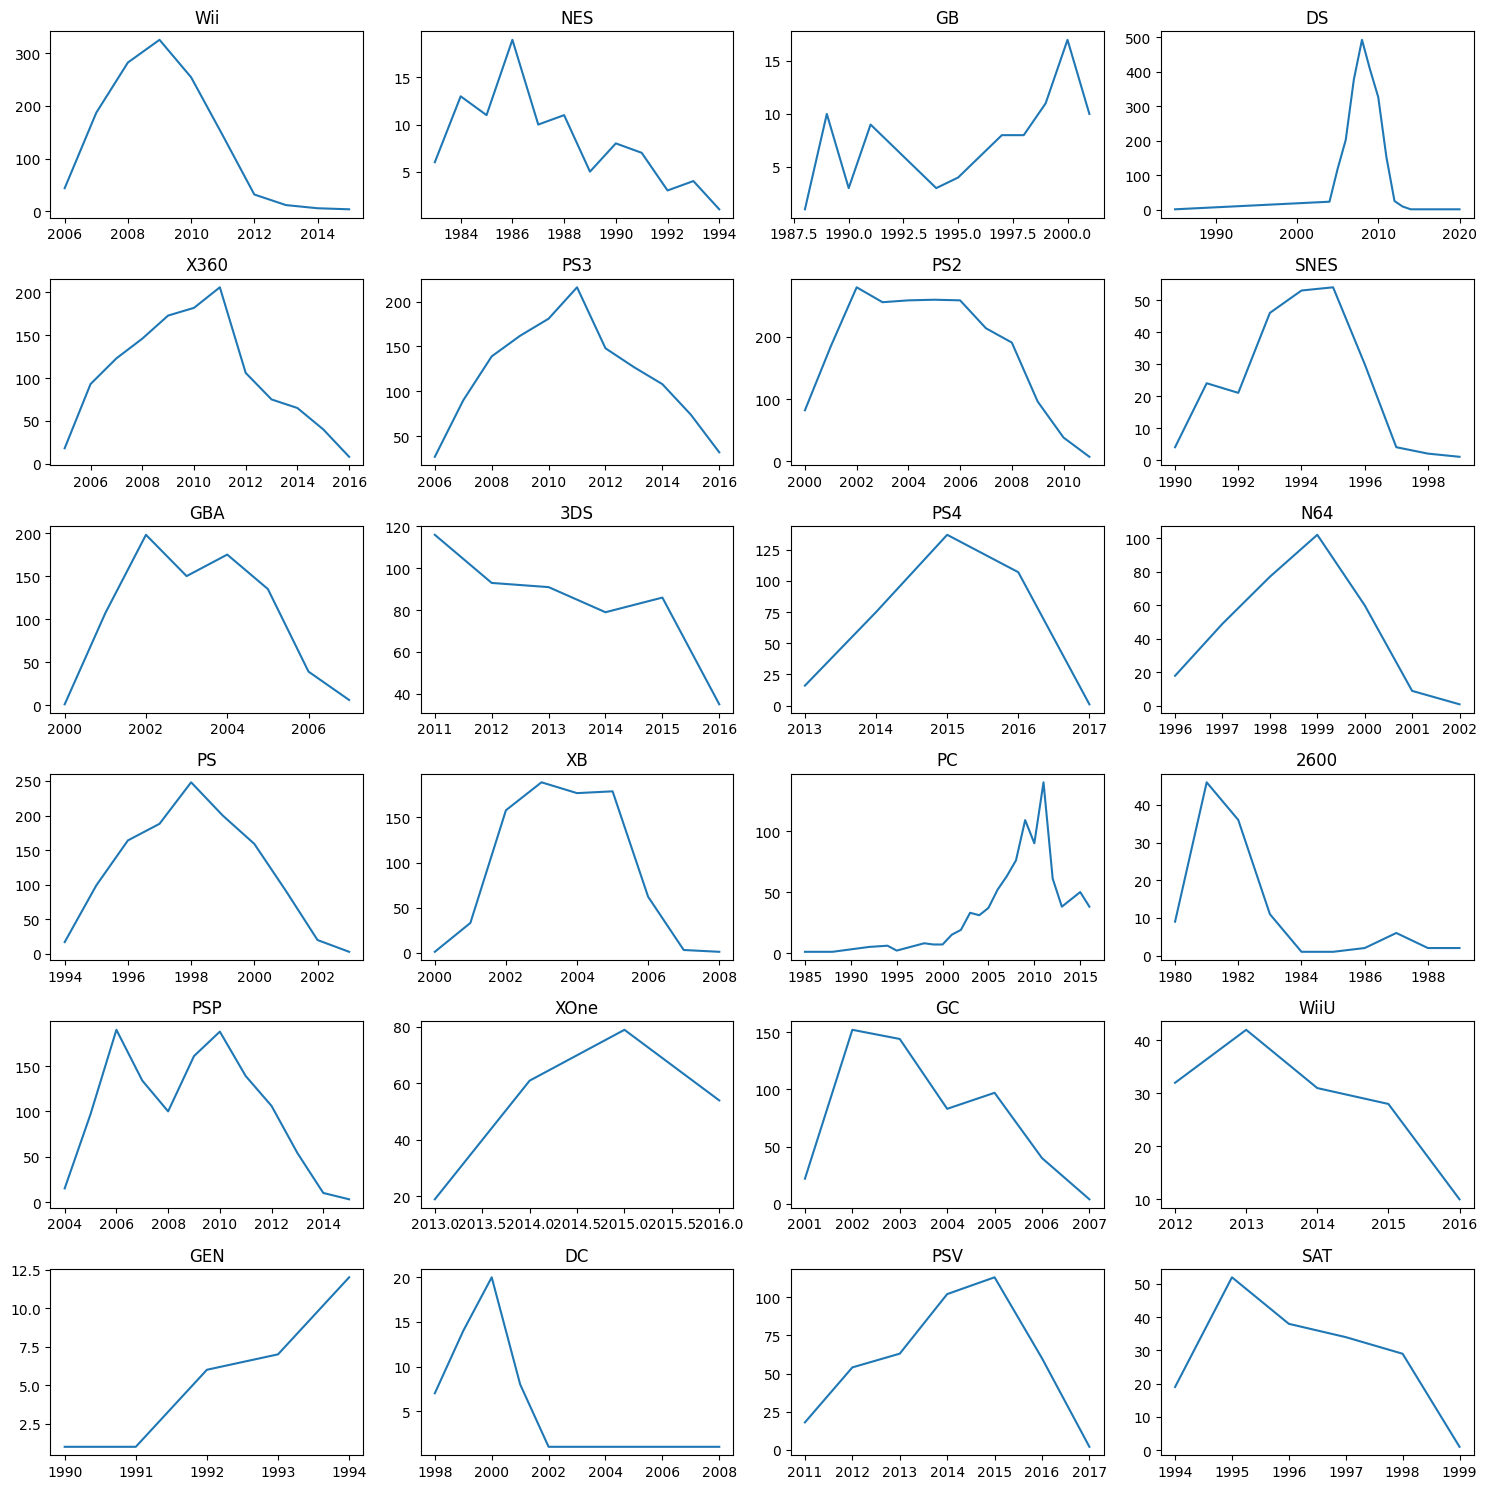

In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(15, 15))


for i, j in enumerate(vgsales['Platform'].unique()[:24]):
  axs[i // 4, i % 4].set_title(f"{j}")
  axs[i // 4, i % 4].plot(vgsales[vgsales['Platform'] == j]['Year'].value_counts().sort_index())

plt.tight_layout()

### Bonus. Как делать трехмерные графики

Давайте немного отвлечемся и обсудим кратко инструменты для создания трехмерных графиков в Python

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(vgsales, x='NA_Sales', y='EU_Sales', z='Global_Sales',
              color='Genre')
fig.show()

In [ ]:
fig = px.scatter_3d(vgsales, x='NA_Sales', y='EU_Sales', z='Global_Sales',
              color='JP_Sales')
fig.show()